In [15]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [16]:


data = []
result = []

# class labels: glioma=0, meningioma=1, pituitary=2, no tumor=3
categories = ['glioma', 'meningioma', 'pituitary', 'notumor']
encoder = OneHotEncoder(sparse_output=False)
encoder.fit([[0], [1], [2], [3]])

for label in range(len(categories)):
    paths = []
    folder = f'Testing/{categories[label]}'
    
    # collect all image paths
    for r, d, f in os.walk(folder):
        for file in f:
            if '.jpg' in file or '.png' in file:
                paths.append(os.path.join(r, file))
    
    # process each image
    for path in paths:
        img = Image.open(path)
        img = img.resize((128, 128))
        img = img.convert('RGB')  # ensure 3 channels
        img = np.array(img)
        if img.shape == (128, 128, 3):
            data.append(img)
            result.append(encoder.transform([[label]])[0])

              
                    

In [17]:
data=np.array(data)
data.shape  

(1311, 128, 128, 3)

In [18]:
print(f'Total number of images we have:{len(data)}')

Total number of images we have:1311


In [19]:
result=np.array(result)


In [32]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [21]:
print(f'Number of images in training data: {len(x_train)}')

Number of images in training data: 1048


In [22]:
print(f'Number of images in testing data: {len(x_test)}')

Number of images in testing data: 263


In [29]:
model=Sequential()
#block 1
model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding='Same'))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#block 2
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
#fully connected layer
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adamax')
print(model.summary())



/home/user/Videos/ML/code/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,586,628 (128.12 MB)

 Trainable params: 33,586,436 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [30]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10


33/33 ━━━━━━━━━━━━━━━━━━━━ 34s 977ms/step - loss: 29.8289 - val_loss: 5.4984
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 977ms/step - loss: 3.3353 - val_loss: 11.1028
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - loss: 1.2792 - val_loss: 20.8348
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 970ms/step - loss: 0.5962 - val_loss: 25.1485
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 990ms/step - loss: 0.4923 - val_loss: 26.9649
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 945ms/step - loss: 0.3549 - val_loss: 30.5777
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 963ms/step - loss: 0.3227 - val_loss: 32.5504
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 960ms/step - loss: 0.2756 - val_loss: 29.7377
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 955ms/step - loss: 0.2522 - val_loss: 27.3375
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 953ms/step - loss: 0.2578 - val_loss: 23.9786


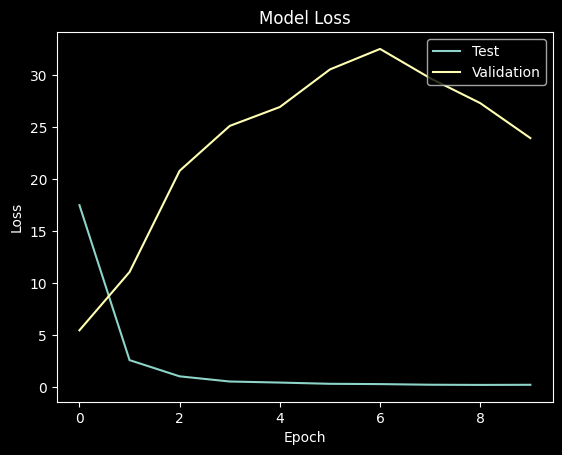

In [31]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [33]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the image
img = load_img('Training/glioma/test1.jpg', target_size=(128, 128))
img = img_to_array(img)
img = img / 255.0  # normalize
img = np.expand_dims(img, axis=0)  # model expects batch

# Predict
prediction = model.predict(img)

# Decode the result
predicted_label = np.argmax(prediction)

# Categories you used
categories = ['glioma', 'meningioma', 'pituitary', 'notumor']

# Show result
print("Predicted Tumor Type:", categories[predicted_label])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Predicted Tumor Type: pituitary


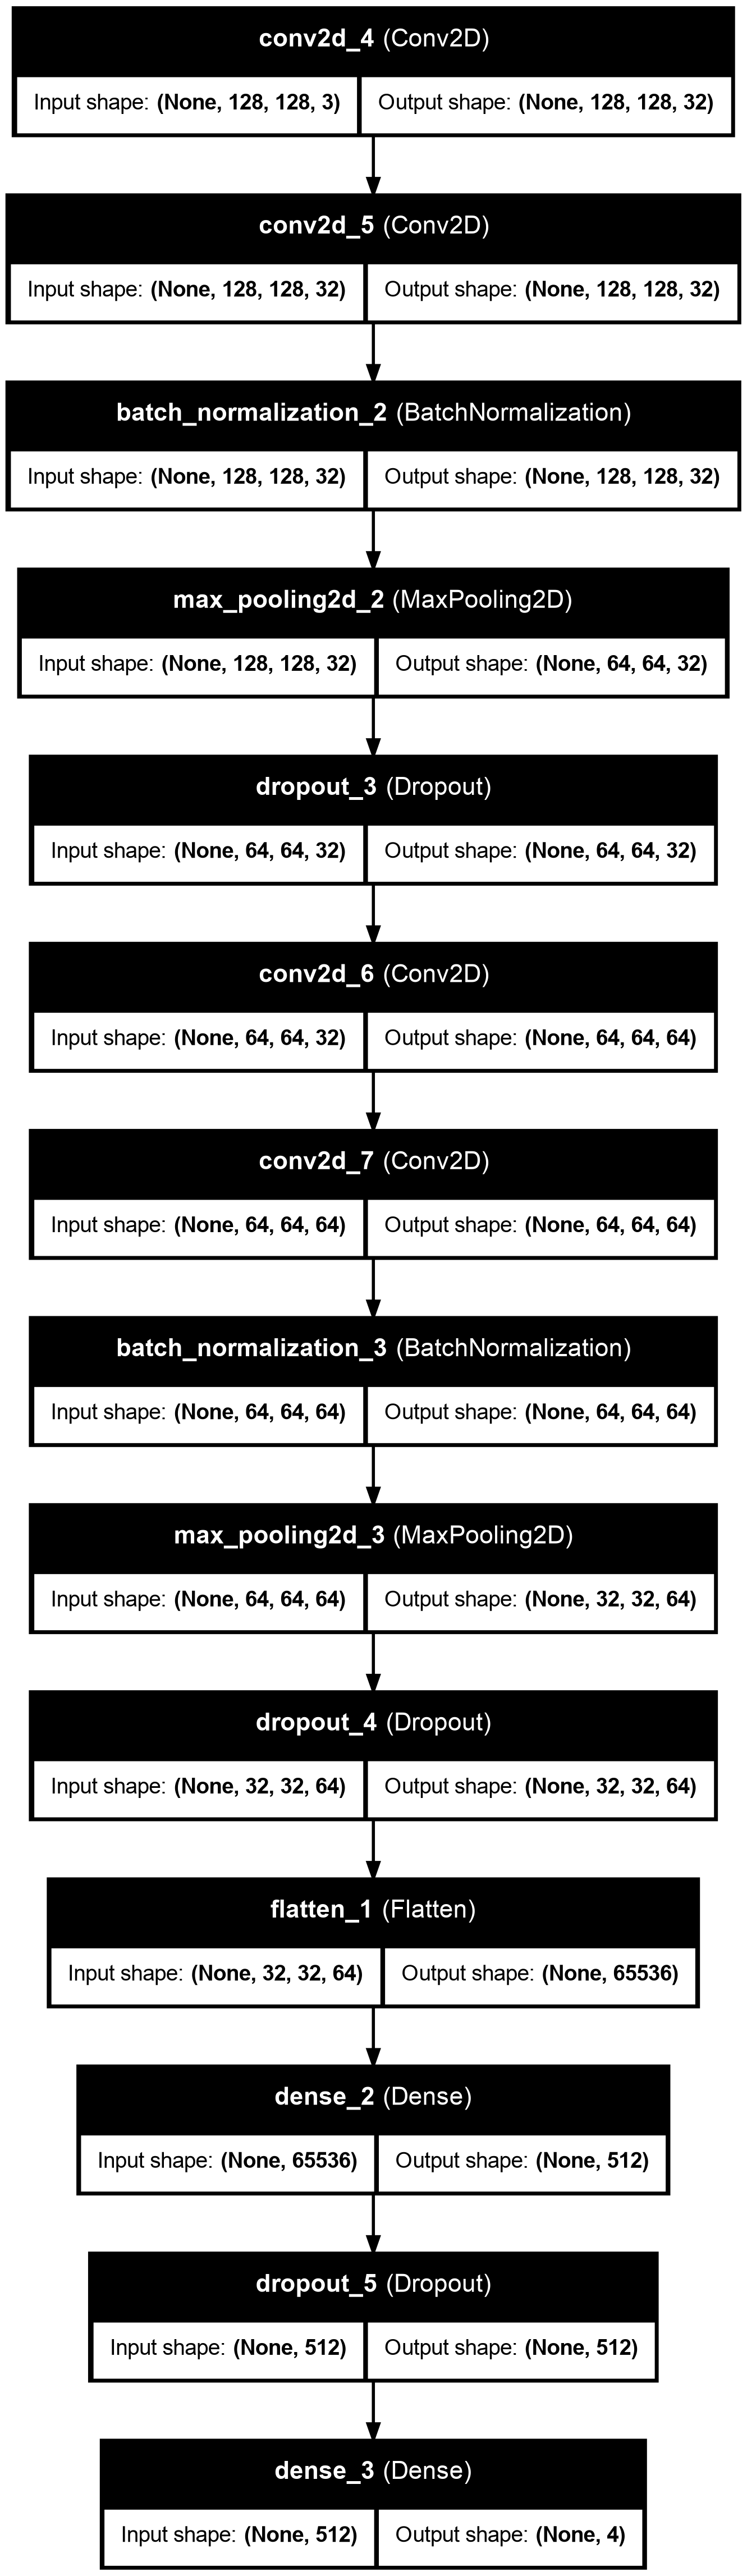

In [27]:
from tensorflow.keras.utils import plot_model

# Save the model plot to a file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
